In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
from tqdm import tqdm
import random

In [3]:
import malaya

model = malaya.dependency.transformer(model = 'xlnet', quantized = True)
pos = malaya.pos.transformer(model = 'xlnet', quantized = True)

In [5]:
t = 'Dia berkata kepada saya.'

In [6]:
tokenizer = malaya.preprocessing.TOKENIZER().tokenize
sastrawi = malaya.stem.sastrawi()

In [7]:
graph, tagging, indexing = model.predict(' '.join(tokenizer(t)))

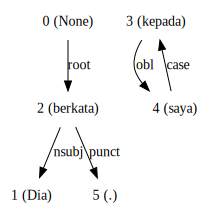

In [8]:
graph.to_graphvis()

In [9]:
pos.predict(' '.join(tokenizer(t)))

[('Dia', 'PRON'),
 ('berkata', 'VERB'),
 ('kepada', 'ADP'),
 ('saya', 'PRON'),
 ('.', 'PUNCT')]

In [10]:
malaya.stack.voting_stack([pos] * 3, ' '.join(tokenizer('Dia berkata kepada saya.')))

[('Dia', 'PRON'),
 ('berkata', 'VERB'),
 ('kepada', 'ADP'),
 ('saya', 'PRON'),
 ('.', 'PUNCT')]

In [12]:
malaya.stack.voting_stack([pos] * 3, ' '.join(tokenizer('Jangan melompat.')))

[('Jangan', 'PART'), ('melompat', 'VERB'), ('.', 'PUNCT')]

In [13]:
malaya.stack.voting_stack([pos] * 3, ' '.join(tokenizer('Dia tersenyum kepada saya.')))

[('Dia', 'PRON'),
 ('tersenyum', 'VERB'),
 ('kepada', 'ADP'),
 ('saya', 'PRON'),
 ('.', 'PUNCT')]

In [18]:
r = malaya.stack.voting_stack([pos] * 3, ' '.join(tokenizer(t)))

In [14]:
start = ['ber', 'ter', 'me', 'men']

def check_tak_transitif(word):
    stemmed = sastrawi.stem(word)
    for s in start:
        if word.startswith(s) and f'{s}{stemmed}' == word:
            return True
    return False

In [15]:
import copy
import re
from malaya.text.regex import _expressions

def reset_t(tokens):
    t = []
    for i in range(len(tokens)):
        t.append([tokens[i], 2])
    return t

def augment_15_0(t, row):
    text, tokens, tokens_lower, tagging = row
    for i in range(len(tokens) - 1):
        if tagging[i] == 'VERB' \
        and tagging[i + 1] not in ['PRON', 'NOUN'] \
        and check_tak_transitif(tokens[i]):
            t[i][0] = sastrawi.stem(tokens[i])
            t[i][1] = 15

In [18]:
results = []
for text in tqdm(['Cerpen itu telah saya karang.', 
                  'Latihan itu mesti kau buat.',
                  'Kereta itu saya beli daripada Ali.',
                  'Surat itu dihantar oleh abang semalam.',
                 'Jangan melompat.']):
    tokens = tokenizer(text)
    t = reset_t(tokens)
    t_ = copy.deepcopy(t)
    tokens_lower = tokenizer(text.lower())
    tagging = malaya.stack.voting_stack([pos] * 3, ' '.join(tokens))
    tagging = list(zip(*tagging))[1]
    r = (t, tokens, tokens_lower, tagging)
    augment_15_0(t_, r)
    results.append((t, t_))

100%|██████████| 5/5 [00:01<00:00,  4.93it/s]


In [19]:
results

[([['Cerpen', 2],
   ['itu', 2],
   ['telah', 2],
   ['saya', 2],
   ['karang', 2],
   ['.', 2]],
  [['Cerpen', 2],
   ['itu', 2],
   ['telah', 2],
   ['saya', 2],
   ['karang', 2],
   ['.', 2]]),
 ([['Latihan', 2],
   ['itu', 2],
   ['mesti', 2],
   ['kau', 2],
   ['buat', 2],
   ['.', 2]],
  [['Latihan', 2],
   ['itu', 2],
   ['mesti', 2],
   ['kau', 2],
   ['buat', 2],
   ['.', 2]]),
 ([['Kereta', 2],
   ['itu', 2],
   ['saya', 2],
   ['beli', 2],
   ['daripada', 2],
   ['Ali', 2],
   ['.', 2]],
  [['Kereta', 2],
   ['itu', 2],
   ['saya', 2],
   ['beli', 2],
   ['daripada', 2],
   ['Ali', 2],
   ['.', 2]]),
 ([['Surat', 2],
   ['itu', 2],
   ['dihantar', 2],
   ['oleh', 2],
   ['abang', 2],
   ['semalam', 2],
   ['.', 2]],
  [['Surat', 2],
   ['itu', 2],
   ['dihantar', 2],
   ['oleh', 2],
   ['abang', 2],
   ['semalam', 2],
   ['.', 2]]),
 ([['Jangan', 2], ['melompat', 2], ['.', 2]],
  [['Jangan', 2], ['lompat', 15], ['.', 2]])]